# Case Study # 5 : ANOVA

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
data.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [5]:
data.shape

(29, 5)

In [6]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [8]:
Zone_A = data['Zone - A']
Zone_B = data['Zone - B']
Zone_C = data['Zone - C']
Zone_D = data['Zone - D']

In [9]:
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

### 1. The mean sales generated by each zone

In [10]:
mean_sales_A = round(np.mean(Zone_A),2)
mean_sales_B = round(np.mean(Zone_B),2)
mean_sales_C = round(np.mean(Zone_C),2)
mean_sales_D = round(np.mean(Zone_D),2)

In [11]:
print('Mean sales generated by Zone A is ', mean_sales_A)
print('Mean sales generated by Zone B is ', mean_sales_B)
print('Mean sales generated by Zone C is ', mean_sales_C)
print('Mean sales generated by Zone D is ', mean_sales_D)

Mean sales generated by Zone A is  1540493.14
Mean sales generated by Zone B is  1755559.59
Mean sales generated by Zone C is  1772871.03
Mean sales generated by Zone D is  1842926.76


### 2. Total sales generated by all the zones for each month 

In [12]:
data1 = data.drop('Month', axis=1)
data1.head()

,Zone - A,Zone - B,Zone - C,Zone - D
0,1483525,1748451,1523308,2267260
1,1238428,1707421,2212113,1994341
2,1860771,2091194,1282374,1241600
3,1871571,1759617,2290580,2252681
4,1244922,1606010,1818334,1326062


In [13]:
monthly_data = data
monthly_data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [14]:
monthly_data['Total Monthly Sales'] = data1.sum(axis=1)
monthly_data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Monthly Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


### 3. Check whether all the zones generate the same amount of sales

Null hypothesis, H0: All zones generate same amount of sales

Alternative hypothesis, Ha: There is significant difference in sales generated by all zones

In [15]:
statistic, p_value = f_oneway(Zone_A, Zone_B, Zone_C, Zone_D)
print('Statistic is ', statistic)
print('p-value is ', p_value)

Statistic is  5.672056106843581
p-value is  0.0011827601694503335


In [16]:
if p_value < 0.05:
    print('We reject null hypothesis and conclude that there is significant difference in sales generated by all the zones')
else:
    print('We fail to reject null hypothesis and conclude that all zones generate same amount of sales')

We reject null hypothesis and conclude that there is significant difference in sales generated by all the zones


In [19]:
zone_sales = data1.sum(axis=0)
zone_sales

Zone - A    44674301
Zone - B    50911228
Zone - C    51413260
Zone - D    53444876
dtype: int64

Text(0, 0.5, 'Sales')

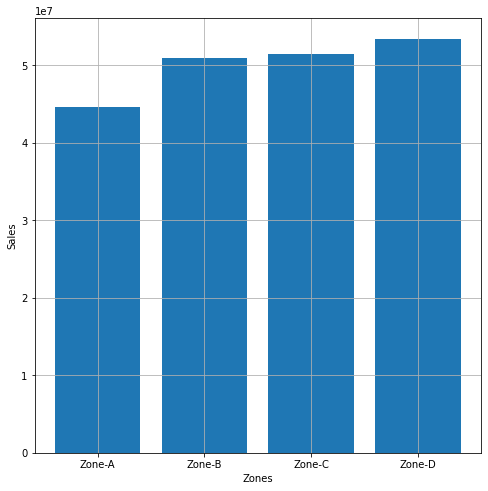

In [34]:
plt.figure(figsize=(8,8))
plt.bar(['Zone-A', 'Zone-B', 'Zone-C', 'Zone-D'], zone_sales)
plt.grid()
plt.xlabel('Zones')
plt.ylabel('Sales')